In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%run util_draw.py
# #### included in util_draw.py ...
# from matplotlib import rc
# rc('text', usetex=True)
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
# import matplotlib.gridspec as gridspec
# import rootpy.plotting.root2matplotlib as rplt
# import ROOT as R
# ####

import json
import rootpy as rpy
from rootpy.io import root_open
from rootpy.plotting import Hist, Hist2D, HistStack
from array import array

In [2]:
dir_data = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
fn_data = 'e1f_sample60_eskim_hists_only.root'
fn_out = 'e1f_sample60_eskim_fid.root'
refit_angp = False

# SC, flange

In [3]:
h2s_sc = None
with root_open('%s/%s'%(dir_data, fn_data)) as fin:
    h2s_sc = [fin.efid_hists_eid['hsc_x_V_y_%d'%sect] for sect in range(1,7)]
    for h2_sc in h2s_sc:
        h2_sc.SetDirectory(0)

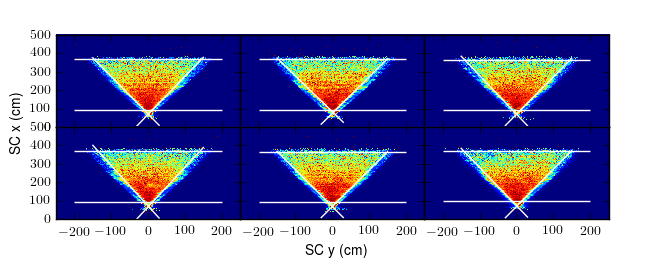

efid_sc_x_of_y	1,92,366,-2.032,70,2.060,68
efid_sc_x_of_y	2,91,369,-1.934,83,1.971,74
efid_sc_x_of_y	3,92,364,-2.092,70,2.024,69
efid_sc_x_of_y	4,94,368,-2.191,72,2.146,67
efid_sc_x_of_y	5,92,365,-1.998,69,1.979,68
efid_sc_x_of_y	6,97,369,-2.070,74,2.017,68


In [9]:
parmsets = []
fig_sc = sdraw([norm_y_slices(h2_sc) for h2_sc in h2s_sc], xlabel='SC y (cm)', ylabel='SC x (cm)')

for (sect, h2_sc) in enumerate(h2s_sc, 1):
    # h2_sc = h2s_sc[0]
    h2 = h2_sc.clone().rebin2_d(2, 8)
    window = 1
    looseness = 0.35
    (ylo, yhi) = get_ylims_of_xmid(h2_sc)
    edge_loX, edge_hiX = get_plateau_edges_2d(h2, looseness, window, ylo, yhi)

    ax = fig_sc.get_axes()[sect-1]
    
#     ax.plot(*zip(*edge_loX), color='k', marker='*', linestyle='none')
#     ax.plot(*zip(*edge_hiX), color='k', marker='*', linestyle='none')
    zL = np.polyfit(*zip(*edge_loX), deg=1)
    f = np.poly1d(zL)
    X = np.linspace(-150, 30, 180)
    Y = f(X)
    ax.plot(X,Y,'w', linewidth=1)
    zH = np.polyfit(*zip(*edge_hiX), deg=1)
    f = np.poly1d(zH)
    X = np.linspace(-30, 150, 180)
    Y = f(X)
    ax.plot(X,Y,'w', linewidth=1)
    ax.hlines([ylo, yhi], -200, 200, 'w')
    parmsets.append((sect, ylo, yhi, zL[0], zL[1], zH[0], zH[1]))

plt.savefig('efid_sc_flange.png')
plt.show()

for parms in parmsets:
    print('efid_sc_x_of_y\t%d,%.0f,%.0f,%.3f,%.0f,%.3f,%.0f'%parms)

In [10]:
fig_sc.savefig('efid_sc_flange.png', dpi=1200)

In [12]:
h2s_sc_31365 = None
with root_open('%s/%s'%(dir_data, '31365_p2v1bos_eskim.root')) as fin:
    h2s_sc_31365 = [fin.efid_hists_eid['hsc_x_V_y_%d'%sect] for sect in range(1,7)]
    for h2_sc in h2s_sc_31365:
        h2_sc.SetDirectory(0)

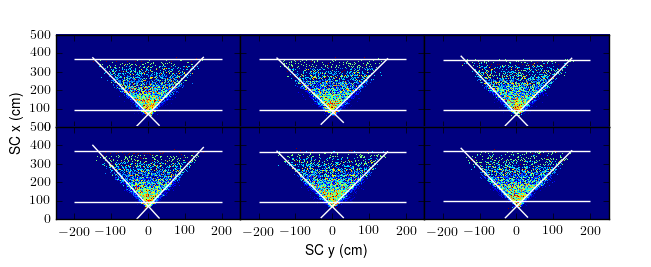

In [13]:
fig_sc_31365 = sdraw([norm_y_slices(h2_sc) for h2_sc in h2s_sc_31365], xlabel='SC y (cm)', ylabel='SC x (cm)')

for (sect, h2_sc) in enumerate(h2s_sc_31365, 1):
    ax = fig_sc_31365.get_axes()[sect-1]
    
    ylo = parmsets[sect-1][1]
    yhi = parmsets[sect-1][2]
    zL = parmsets[sect-1][3:5]
    zH = parmsets[sect-1][5:]
    
    f0 = np.poly1d(zL)
    X0 = np.linspace(-150, 30, 180)
    Y0 = f0(X0)
    f1 = np.poly1d(zH)
    X1 = np.linspace(-30, 150, 180)
    Y1 = f1(X1)
    
    ax.plot(X0,Y0,'w', linewidth=1)
    ax.plot(X1,Y1,'w', linewidth=1)
    ax.hlines([ylo, yhi], -200, 200, 'w')

plt.show()

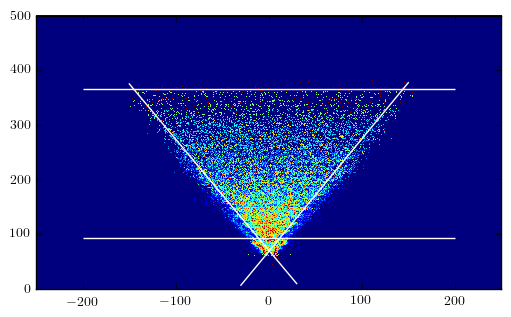

In [14]:
h2_sc = h2s_sc_31365[0]
draw(norm_y_slices(h2_sc), figsize=goldenaspect(6))

ylo = parmsets[0][1]
yhi = parmsets[0][2]
zL = parmsets[0][3:5]
zH = parmsets[0][5:]

f0 = np.poly1d(zL)
X0 = np.linspace(-150, 30, 180)
Y0 = f0(X0)
f1 = np.poly1d(zH)
X1 = np.linspace(-30, 150, 180)
Y1 = f1(X1)

plt.plot(X0,Y0,'w', linewidth=1)
plt.plot(X1,Y1,'w', linewidth=1)
plt.hlines([ylo, yhi], -200, 200, 'w')
plt.show()

# EC, uvw

In [ ]:
draw(norm_x_slices(h2_u1), figsize=goldenaspect(6))
plt.vlines(20, 0, 0.5, 'w')
plt.vlines(400, 0, 0.5, 'w')
draw(norm_x_slices(h2_v1), figsize=goldenaspect(6))
plt.vlines(375, 0, 0.5, 'w')
draw(norm_x_slices(h2_w1), figsize=goldenaspect(6))
plt.vlines(410, 0, 0.5, 'w')
print(h2_u1.name, h2_v1.name, h2_w1.name)

# electron, p-theta-phi

In [15]:
fn_data = 'e1f_sample60_eskim_cutflange_efid_hists.root'

h3s_angp = None
with root_open('%s/%s'%(dir_data, fn_data)) as fin:
    h3s_angp = [fin.efid_cut_flange['hangp_s%d'%sect] for sect in range(1,7)]
    for h3_angp in h3s_angp:
        h3_angp.SetDirectory(0)

efid_t0	1,9.889,27.054,0.464
efid_t0	2,9.693,27.819,0.473
efid_t0	3,8.309,39.712,0.869
efid_t0	4,10.159,25.875,0.411
efid_t0	5,9.574,29.887,0.591
efid_t0	6,9.795,31.500,0.669


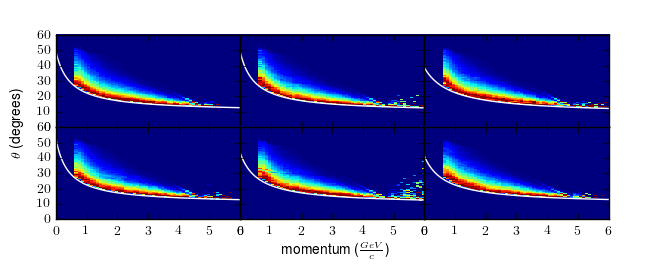

In [224]:
for h3 in h3s_angp:
    h3.xaxis.SetRange(0,-1)
    h3.yaxis.SetRange(59,63)
    h3.zaxis.SetRange(0,-1)
htps = [asrootpy(norm_x_slices(h3.project3_d("xz"))) for h3 in h3s_angp]
for h3 in h3s_angp:
    h3.yaxis.SetRange(0,-1)
fig_pts = sdraw(htps, xlabel=r'momentum ($\frac{GeV}{c}$)', ylabel=r'$\theta$ (degrees)')

theta0_tf1 = R.TF1('theta0_tf1', '[0]+2250.0/3375.0*[1]/(x+[2])', 0, 6)
parmsets = []
for (sect, htp) in enumerate(htps, 1):
    [loY, hiY, loYerr] = get_yedges_2d(htp, loose=0.5, window=2)
    points = [(x,y) for (x,y) in loY if x>0 and x<5]
    Xd,Yd = zip(*points)
    yerrs = [yerr for ((x,y),yerr) in zip(loY, loYerr) if x>0 and x<5]
    Xls = np.linspace(0,6,600)

    g = R.TGraph(len(Xd), array('d', Xd), array('d', Yd))
    res = g.Fit(theta0_tf1, 'S')
    parms = [theta0_tf1.GetParameter(i) for i in range(0,3)]
    Xfit, Yfit = zip(*get_points_from_TF1(theta0_tf1, 0, 6))
#     parms, cov = curve_fit(theta0, Xd, Yd, sigma=yerrs, maxfev=1000)

    ax = fig_pts.get_axes()[sect-1]
#     ax.plot(Xd, Yd, marker='*', color='k', linestyle='none', markersize=8)
#     ax.plot(Xls, theta0(Xls, *parms), 'k-', linewidth=2)
    ax.plot(Xfit, Yfit, 'w-')
    parmsets.append(tuple([sect] + list(parms)))

for parms in parmsets:
    print('efid_t0\t%d,%.3f,%.3f,%.3f'%parms)

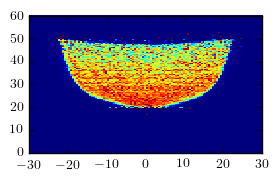

In [16]:
h3 = h3s_angp[0]
h3.zaxis.set_range(13,13)
h2 = asrootpy(h3.project3_d('xy'))
draw(norm_y_slices(h2))
plt.show()

In [17]:
#%run util_draw.py
window = 4
looseness = 0.5
(ylo, yhi) = get_ylims_of_xmid(h2)
edge_loX, edge_hiX = get_plateau_edges_2d(h2, looseness, window, ylo, yhi)

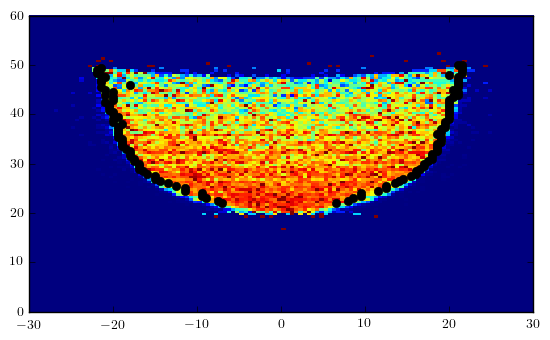

In [18]:
draw(norm_y_slices(h2), figsize=goldenaspect(6.5))
X0,Y0 = zip(*edge_loX)
X1,Y1 = zip(*edge_hiX)
plt.plot(X0, Y0, 'ko')
plt.plot(X1, Y1, 'ko')
plt.show()

In [37]:
# for (pt0, pt1) in zip(list(reversed(edge_loX))[:-1], list(reversed(edge_loX))[1:]):


In [112]:
points = edge_hiX # + edge_loX
Xd, Yd = zip(*points)
g = R.TGraph(len(Xd), array('d', Yd), array('d', Xd))

In [113]:
h3.zaxis.get_bin_center(13)

1.2500000000000002

In [114]:
import math

def dDphi(x, par):
    
    t = x[0]
    p = par[9]
    b = par[8]
    ta, tb, tc, td = par[4], par[5], par[6], par[7]
    t0 = ta + tb/((p+tc)*td)
    
    if t < t0:
        return 0
    
    fa = [par[0], par[1], par[2], par[3]]
    F = sum([_f*p**i for (i,_f) in enumerate(fa)])
    
    return F*(1-math.exp(b*(t-t0)))

Ib, Imax = 2250.0, 3375.0
fdphi = R.TF1('fdphi', dDphi, 0, 80, 10)
fdphi.SetParameters(34.76, -13.51, 3.356, -0.3055, 9.563, 30.341, 0.510, Imax/Ib, -0.4, 1.25)
fdphi.FixParameter(4, 9.563)
fdphi.FixParameter(5, 30.341)
fdphi.FixParameter(6, 0.510)
fdphi.FixParameter(7, Imax/Ib)
fdphi.FixParameter(9, 1.25)

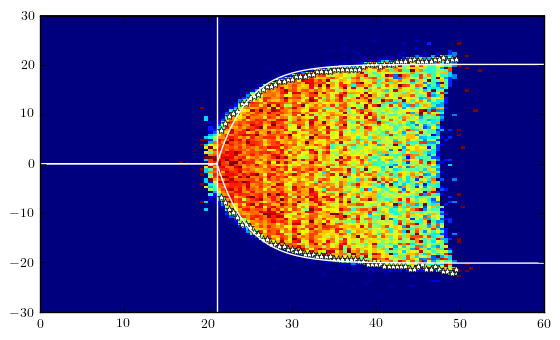

In [115]:
def theta0(p, A, B, C):
    Ib = 2250.0
    Imax = 3375.0
    return A + Ib/Imax * B/(p+C)

g.Fit(fdphi, 'RS')
h3.zaxis.set_range(13,13)
h2 = asrootpy(h3.project3_d('yx'))
draw(norm_x_slices(h2), figsize=goldenaspect(6.5))
Xls = np.linspace(0,80, 800)
Y = [fdphi.Eval(x) for x in Xls]
plt.plot(Y1, X1, 'w*') #, fillstyle='none')
plt.plot(Xls, Y, 'w-')
plt.vlines(theta0(1.25, 9.563, 30.341, 0.510), -30, 30, 'w')
plt.plot(Y0, X0, 'w*') #, fillstyle='none')
plt.plot(Xls, [-y for y in Y], 'w-')
plt.show()

In [13]:
def theta0(p, A, B, C):
    Ib = 2250.0
    Imax = 3375.0
    return A + Ib/Imax * B/(p+C)

def fdphi4(arg, par):
    '''x0: (fixed per p) minimum theta locked in by above efid_t0
       y0: phi edge value at theta=x0
       x1: theta value at point of slope change
       ma: slope on segment (x0,y0)-->(x1, y0+(x1-x0)*b)=(x1,y1)
       mb: slope beyond x1
       x2: (fixed per p) maximum theta
        w: (fixed) used to distinguish upper (+1) and lower (-1) bounding parameters
    '''
    x = arg[0]
    val = 0
    (x0,y0,x1,ma,mb,x2,w) = tuple(par)
    if x <= x0 or x >= x2:
        val = 0
    else:
        y1 = y0+ma*(x1-x0)
        if x > x0 and x < x1:
            val = w*(y0+ma*(x-x0))
        elif x >= x1 and x < x2:
            val = w*(y1+mb*(x-x1))
    return val

fdphi = R.TF1('fdphi', fdphi4, 0, 80, 7)

x0 = theta0(1.25, 9.563, 30.341, 0.510)
fdphi.FixParameter(0, x0)
fdphi.SetParameter(1, 0)
fdphi.SetParLimits(1, 0, 10)
fdphi.SetParameter(2, x0+8)
fdphi.SetParLimits(2, x0+2, x0+14)
fdphi.SetParameter(3, 1.5)
fdphi.SetParLimits(3, 1, 3)
fdphi.SetParameter(4, 0.1)
fdphi.SetParLimits(4, 0, 0.5)
fdphi.FixParameter(5, 55)
fdphi.FixParameter(6, 1)

1.2500000000000002


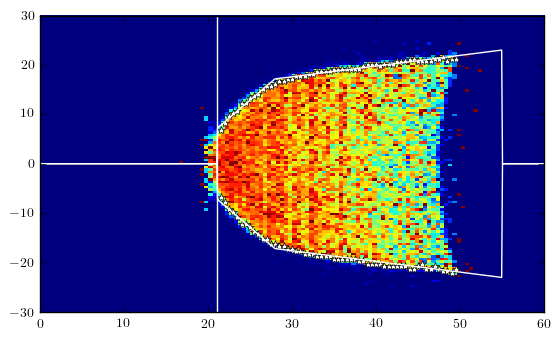

In [64]:
g.Fit(fdphi, 'RS')
print(h3.zaxis.get_bin_center(13))
h3.zaxis.set_range(13, 13)
h2 = asrootpy(h3.project3_d('yx'))
h3.zaxis.set_range(0, -1)
draw(norm_x_slices(h2), figsize=goldenaspect(6.5))
Xls = np.linspace(0,80, 800)
Y = [fdphi.Eval(x) for x in Xls]
plt.plot(Y1, X1, 'w*') #, fillstyle='none')
plt.plot(Xls, Y, 'w-')
plt.vlines(theta0(1.25, 9.563, 30.341, 0.510), -30, 30, 'w')
plt.plot(Y0, X0, 'w*') #, fillstyle='none')
plt.plot(Xls, [-y for y in Y], 'w-')
plt.show()

In [5]:
efid_t0_str = '''efid_t0	1,9.563,30.341,0.510
efid_t0	2,9.830,27.505,0.381
efid_t0	3,8.229,42.265,0.850
efid_t0	4,10.027,27.751,0.409
efid_t0	5,9.772,29.545,0.497
efid_t0	6,9.413,34.932,0.699'''

efid_t0_parms = [line.split('\t')[1].split(',')[1:] for line in efid_t0_str.split('\n')]

In [16]:
fdphi.SetParameter(1, 0)
fdphi.SetParLimits(1, 0, 10)
fdphi.SetParameter(2, x0+8)
fdphi.SetParLimits(2, x0+2, x0+14)
fdphi.SetParameter(3, 1.5)
fdphi.SetParLimits(3, 1, 3)
fdphi.SetParameter(4, 0.1)
fdphi.SetParLimits(4, 0, 0.5)
fdphi.FixParameter(5, 55)

if refit_angp:
    R.gROOT.SetBatch(1)

    parmsetsS = [[], [], [], [], [], []]
    for sect, h3 in enumerate(h3s_angp, 1):
        t0_parms = [float(parm) for parm in efid_t0_parms[sect-1]]
        h3.xaxis.set_range(0, -1)
        h3.yaxis.set_range(0, -1)
        h3.zaxis.set_range(0, -1)
        hp = asrootpy(h3.projection_z())
        pbinI, pbinF = hp.find_first_bin_above(0), hp.find_last_bin_above(0)
        for pbin in range(pbinI, pbinF+1):
            pval = hp.get_bin_center(pbin)
            t0 = theta0(pval, *t0_parms)
            h2xy = asrootpy(h3.project3_d('xy'))
            (ylo, yhi) = get_ylims_of_xmid(h2xy)
            window, looseness = 2, 0
            edge_loX, edge_hiX = get_plateau_edges_2d(h2xy, looseness, window, ylo, yhi)
            X0,Y0 = zip(*edge_loX)
            X1,Y1 = zip(*edge_hiX)
            Xd,Yd = list(X1)+[-x for x in X0], list(Y1)+list(Y0)
            g = R.TGraph(len(Xd), array('d', Yd), array('d', Xd))

            fdphi.FixParameter(0, t0)
            fdphi.FixParameter(6, 1)
            g.Fit(fdphi, 'QNRS', 'goff', t0, max(Yd))
            chi2 = fdphi.GetChisquare()
            ndf = fdphi.GetNDF()
            parms = [fdphi.GetParameter(i) for i in range(0,6)]
            parmsetsS[sect-1].append({pval:(pval, chi2, ndf, parms)})

    json.dump(parmsetsS, open("heangp_parmsets.json",'w'))

    R.gROOT.SetBatch(1)

In [33]:
parmsetsS = json.load(open('heangp_parmsets.json'))
parmsets = [list(d.values())[0] for d in parmsetsS[0]]

In [40]:
efid_t0_str = '''efid_t0	1,9.563,30.341,0.510
efid_t0	2,9.830,27.505,0.381
efid_t0	3,8.229,42.265,0.850
efid_t0	4,10.027,27.751,0.409
efid_t0	5,9.772,29.545,0.497
efid_t0	6,9.413,34.932,0.699'''
efid_t0_parms = [line.split('\t')[1].split(',')[1:] for line in efid_t0_str.split('\n')]

efid_parms =[{'p':p, 'chi2':chi2, 'ndf':ndf,
              'theta0':t0, 'phi0':phi0, 'theta1':t1,
              'm01':ma, 'm12':mb, 'theta2':t2}
             for (p, chi2, ndf, (t0, phi0, t1, ma, mb, t2))
             in parmsets]

In [43]:
import pandas as pd
df_efid_parms = pd.DataFrame(efid_parms)

In [55]:
df_efid_parms

,chi2,m01,m12,ndf,p,phi0,theta0,theta1,theta2
0,57.804118,3.000000,0.229203,96,0.65,10.000000,27.000356,29.466155,55.0
1,42.619974,3.000000,0.245818,102,0.75,10.000000,25.616439,27.869034,55.0
2,55.634225,2.335422,0.252485,108,0.85,10.000000,24.436039,27.212626,55.0
3,53.591992,1.631832,0.252483,112,0.95,10.000000,23.417338,27.423770,55.0
4,38.512463,1.175750,0.240286,114,1.05,10.000000,22.529239,28.478033,55.0
5,34.718805,1.000000,0.234736,118,1.15,10.000000,21.748141,28.938487,55.0
6,35.224454,1.000000,0.240285,120,1.25,9.859367,21.055803,28.099860,55.0
7,41.645698,1.000000,0.245825,124,1.35,9.504529,20.437910,27.633116,55.0
8,43.850142,1.000000,0.252485,126,1.45,9.116399,19.883068,27.264195,55.0
9,48.163164,1.000000,0.252484,128,1.55,8.710259,19.382094,27.137342,55.0


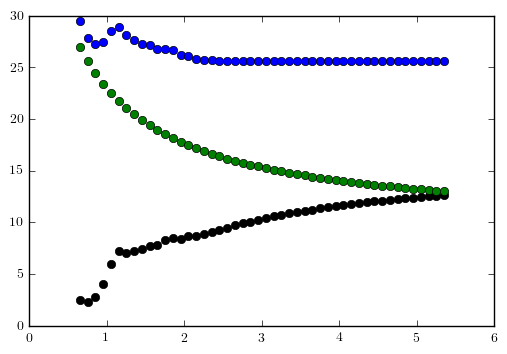

In [62]:
# plt.plot(df_efid_parms.p, df_efid_parms.chi2/df_efid_parms.ndf, 'ko')
# plt.show()
# plt.plot(df_efid_parms.p, df_efid_parms.chi2, 'ko')
plt.plot(df_efid_parms.p, df_efid_parms.theta1-df_efid_parms.theta0, 'ko')
plt.plot(df_efid_parms.p, df_efid_parms.theta1, 'bo')
plt.plot(df_efid_parms.p, df_efid_parms.theta0, 'go')

In [295]:
import math

efid_t0_str = '''efid_t0	1,9.563,30.341,0.510
efid_t0	2,9.830,27.505,0.381
efid_t0	3,8.989, 34.265, 0.8
efid_t0	4,10.027,29.251,0.609
efid_t0	5,9.774,29.187,0.571
efid_t0	6,9.413,34.932,0.699'''

# efid_t0_str = '''efid_t0	1,9.889,27.054,0.464
# efid_t0	2,9.693,27.819,0.473
# efid_t0	3,8.309,39.712,0.869
# efid_t0	4,10.159,25.875,0.411
# efid_t0	5,9.574,29.887,0.591
# efid_t0	6,9.795,31.500,0.669'''
efid_t0_parms = [line.split('\t')[1].split(',')[1:] for line in efid_t0_str.split('\n')]

def theta0(p, A, B, C):
    Ib = 2250.0
    Imax = 3375.0
    return A + Ib/Imax * B/(p+C)

def dDphi(x, par):
    
    t = x[0]
    p = par[6]
    b = par[5]
#     ta, tb, tc, td = par[4], par[5], par[6], par[7]
    t0 = par[4] # ta + tb/((p+tc)*td)
    
    if t < t0:
        return 0
    
    fa = [par[0], par[1], par[2], par[3]]
    F = sum([_f*p**i for (i,_f) in enumerate(fa)])
    
    return F*(1-math.exp(b*(t-t0)))

fdphi2 = R.TF1('fdphi2', dDphi, 0, 80, 7)

def fit_eangp_slice(h3s, sect, p, f):
        h3 = h3s[sect-1]
        #initially, unfix p0 and p4
        t0_parms = [float(parm) for parm in efid_t0_parms[sect-1]]
        t0 = theta0(p, *t0_parms)
        f.SetParameters(23.43, -6, 2.5, -0.4, t0-1, -0.18, p)
        f.FixParameter(0, 24.077)
        f.FixParameter(1, -4.613)
        f.FixParameter(2, 1.823)
        f.FixParameter(3, -0.2746)
        f.FixParameter(4, t0-1.5)
#         f.SetParLimits(4, t0-5, t0)
        f.FixParameter(5, -0.18)
        f.FixParameter(6, p)
        
        pbin = h3.zaxis.find_bin(p)
        h3.zaxis.set_range(pbin, pbin)
        h2 = asrootpy(h3.project3_d('xy'))
        window, looseness = 4, 1
        (ylo, yhi) = get_ylims_of_xmid(h2, 'falling', 0.05)
        edge_loX, edge_hiX = get_plateau_edges_2d(h2, looseness, window, ylo, yhi)
        # SMOOTH
        for i in range(1, len(edge_loX)):
            (x0,y0) = edge_loX[i-1]
            (x1,y1) = edge_loX[i]
            if x0 > x1:
                edge_loX[i-1] = (edge_loX[i][0], edge_loX[i-1][1])
            (x0,y0) = edge_hiX[i-1]
            (x1,y1) = edge_hiX[i]
            if x0 > x1:
                edge_hiX[i-1] = (edge_hiX[i][0], edge_hiX[i-1][1])

        X0,Y0 = zip(*edge_loX)
        X1,Y1 = zip(*edge_hiX)
        Xd,Yd = list(X1)+list([-x for x in X0]), list(Y1)+list(Y0)
        # transpose in graph for fit; reflect negative to positive
        # under symmetry assumption
        g = R.TGraph(len(Xd), array('d', Yd), array('d', Xd))
        g.Fit(f, 'S', '', ylo, yhi)
        
        h2yx = asrootpy(h3.project3_d('yx'))
        h3.zaxis.set_range(0, -1)
        fig = draw(norm_x_slices(h2yx), figsize=goldenaspect(6.5))
        Xls = np.linspace(0,80, 800)
        Y = [f.Eval(x) for x in Xls]
        plt.plot(Y1, X1, 'k*') #, fillstyle='none')
        plt.plot(Xls, Y, 'w-')
        plt.vlines(theta0(p, *t0_parms), -30, 30, 'w')
        plt.plot(Y0, X0, 'k*') #, fillstyle='none')
        plt.plot(Xls, [-y for y in Y], 'w-')
        return [fig, (sect, p, fdphi2.GetChisquare(), fdphi2.GetNDF(),
                      [fdphi2.GetParameter(i) for i in range(0,7)])]

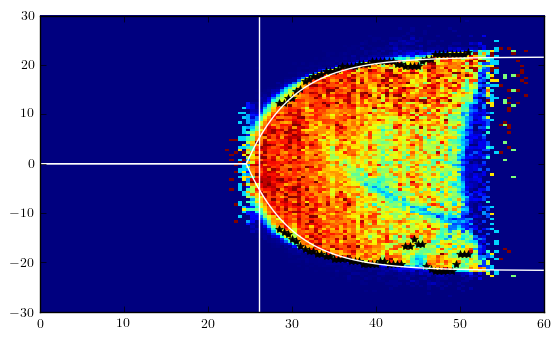

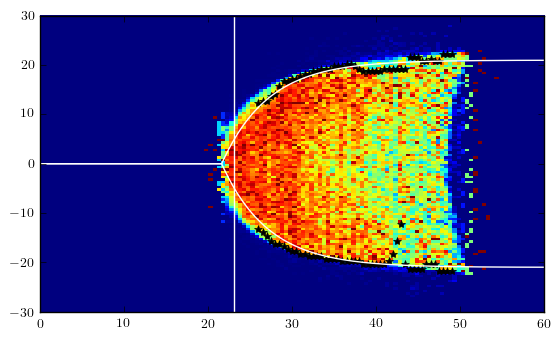

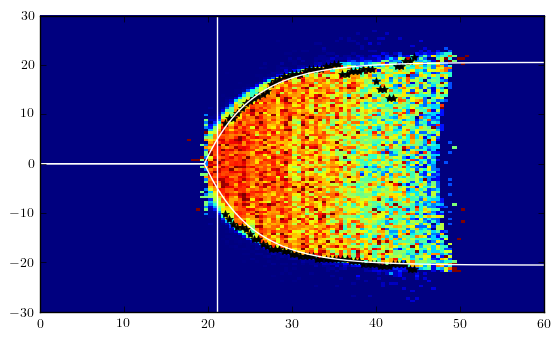

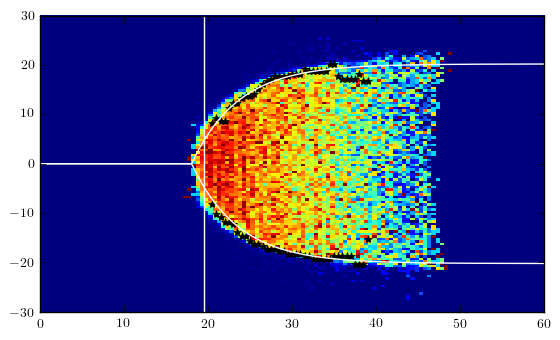

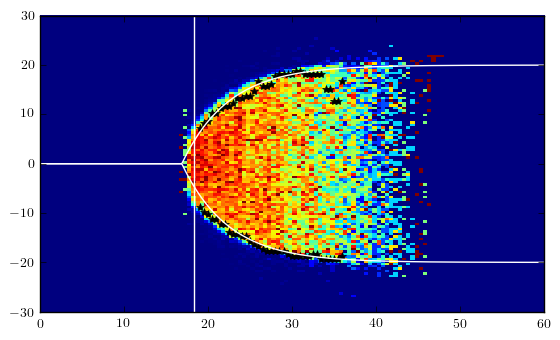

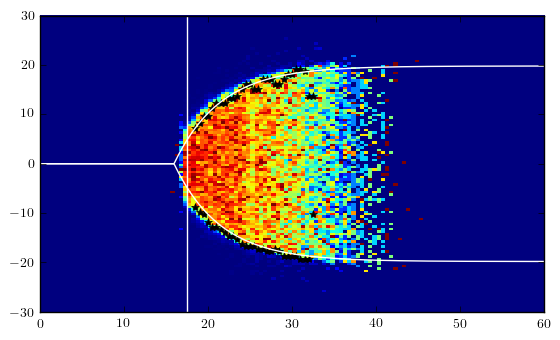

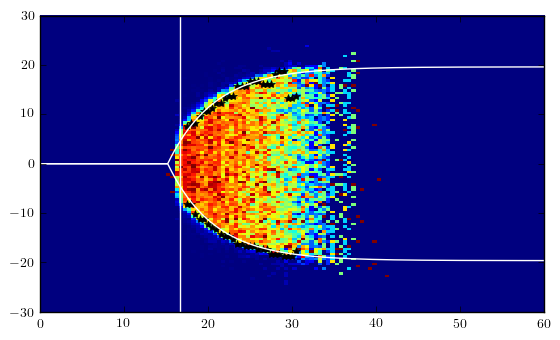

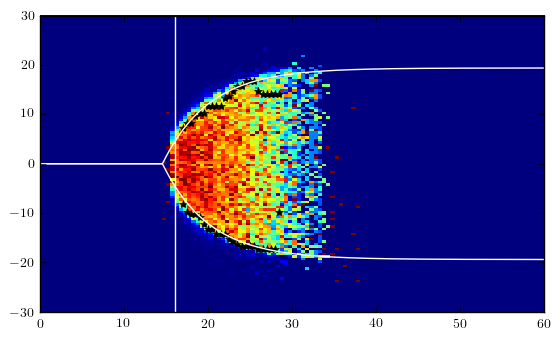

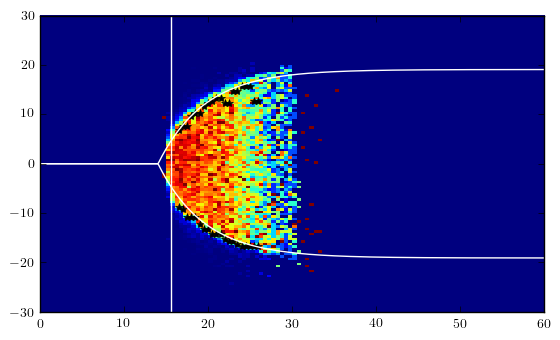

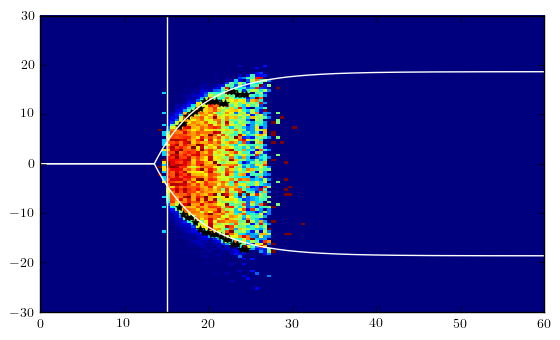

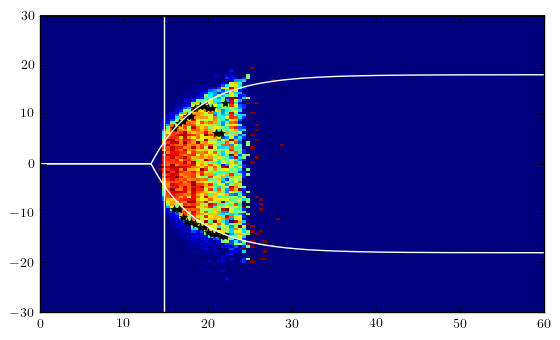

In [296]:
# R.TF1.set_pars = f_set_parms1
# fit_eangp_slice(h3s_angp, 1, 1, fdphi1)
# plt.show()

# fdphi2.SetRange(22, 40)
# R.TF1.set_pars = f_set_parms2
s1 = [fit_eangp_slice(h3s_angp, 6, p, fdphi2) for p in np.arange(0.7, 4, 0.3)]

[-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5]
[ -4.57358480e-15   2.58744652e-14  -4.75078771e-14   2.40770000e+01]


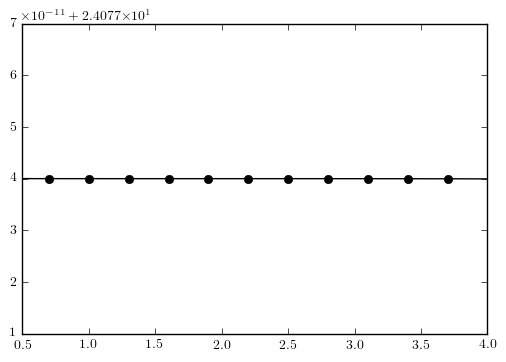

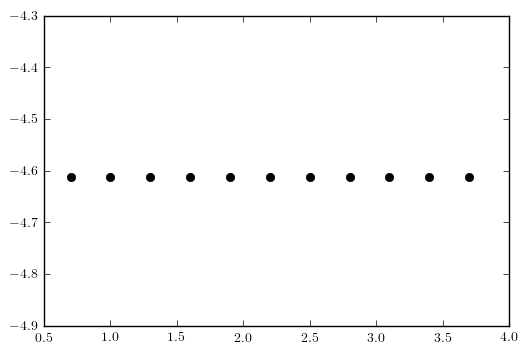

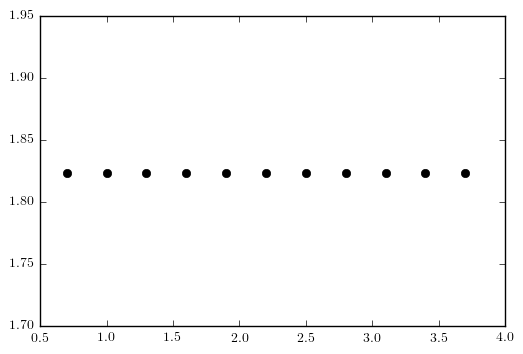

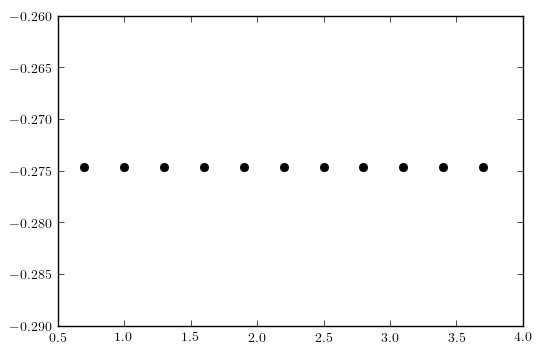

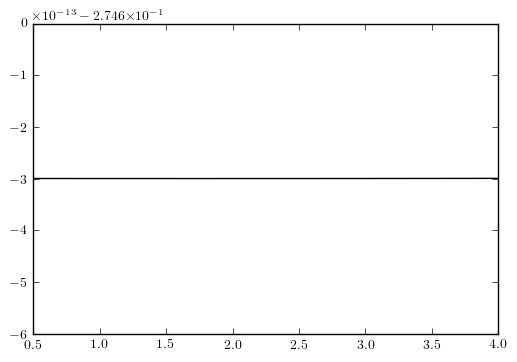

[  6.51354535e-17  -2.25894276e-16  -2.74600000e-01]


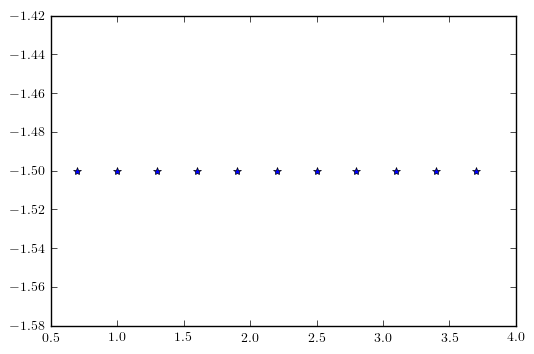

In [297]:
# t0_parms = [float(parm) for parm in efid_t0_parms[sect-1]]
print([s[1][4][4]-theta0(s[1][4][6], *[float(parm) for parm in efid_t0_parms[s[1][0]-1]]) for s in s1])
X,Y = zip(*[(s[1][1], s[1][4][0]) for s in s1])
plt.plot(X,Y, 'ko')
z = np.polyfit(X, Y, 3)
print(z)
Xls = np.linspace(0.5,4,80)
f = np.poly1d(z)
plt.plot(Xls, f(Xls), 'k-')
plt.show()

X,Y = zip(*[(s[1][1], s[1][4][1]) for s in s1])
plt.plot(X,Y, 'ko')
plt.show()

X,Y = zip(*[(s[1][1], s[1][4][2]) for s in s1])
plt.plot(X,Y, 'ko')
plt.show()

X,Y = zip(*[(s[1][1], s[1][4][3]) for s in s1])
plt.plot(X,Y, 'ko')
plt.show()

z = np.polyfit(X, Y, 2)
Xls = np.linspace(0.5,4,80)
f = np.poly1d(z)
plt.plot(Xls, f(Xls), 'k-')
plt.show()
X,Y = zip(*[(s[1][1], s[1][4][4]-theta0(s[1][4][6], *[float(parm) for parm in efid_t0_parms[s[1][0]-1]])) for s in s1])
plt.plot(X, Y, 'b*')
print(z)

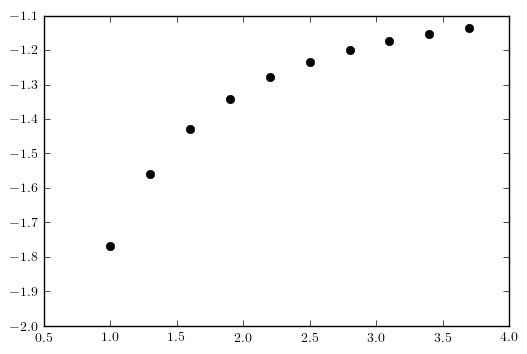

In [298]:
X,Y = zip(*[(p, theta0(p, 8.774,29.187,0.571)-theta0(p, 9.772,29.545,0.497))
            for p in np.arange(0.7,4,0.3)])
plt.ylim(-2.0,-1.1)
plt.plot(X,Y,'ko')

(6, 3.7000000000000002, 81.34328405142708, 22, [24.077, -4.613, 1.823, -0.2746, 13.206930438736077, -0.18, 3.7])


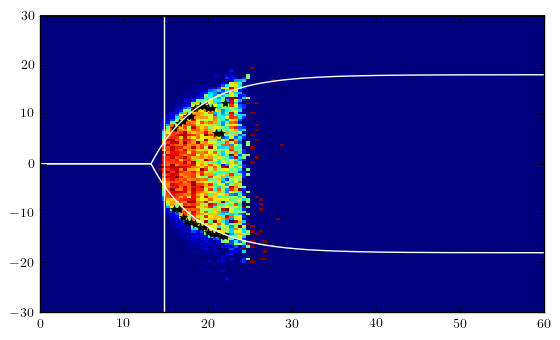

In [299]:
p=len(s1)-1
print(s1[p][1])
s1[p][0]

INFO:ROOT.TCanvas.Print] png file /tmp/tmpv4ku46ov.png has been created


hangp_s1_xy_43
-11.25 -6.75
-6.75 0.0
0.0 6.75
6.75 14.75
218.0 436.0


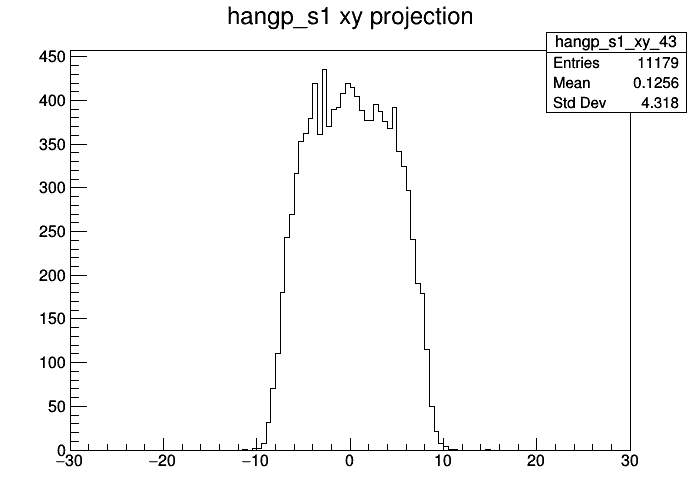

In [40]:
h1 = asrootpy(R.gDirectory.Get("hangp_s1_xy_43"))
h1_xmin = h1.get_bin_low_edge(1)
h1_xmax = h1.get_bin_low_edge(h1.get_nbins_x()+1)
fplat = R.TF1('%s_fplat'%h1.name, funcR_plateau, h1_xmin, h1_xmax, 5)

p0_xmin = b0_xmax = h1.get_bin_center(h1.find_first_bin_above(h1.get_maximum()/2))
p1_xmax = b1_xmin = h1.get_bin_center(h1.find_last_bin_above(h1.get_maximum()/2))
p0_xmax = p1_xmin = (p1_xmax+p0_xmin)/2
b0_xmin = h1.get_bin_center(h1.find_first_bin_above(0))
b1_xmax = h1.get_bin_center(h1.find_last_bin_above(0))
print(h1.name)
print(b0_xmin, b0_xmax)
print(p0_xmin, p0_xmax)
print(p1_xmin, p1_xmax)
print(b1_xmin, b1_xmax)
print(h1.get_maximum()/2, h1.get_maximum())
h1

In [32]:
h1.name

'hangp_s1_xy_43'

In [118]:
import math

def dDphi(x, par):
    
    t = x[0]
    p = par[9]
    b = par[8]
    ta, tb, tc, td = par[4], par[5], par[6], par[7]
    t0 = ta + tb/((p+tc)*td)
    
    if t < t0:
        return 0
    
    fa = [par[0], par[1], par[2], par[3]]
    F = sum([_f*p**i for (i,_f) in enumerate(fa)])
    
    return F*(1-math.exp(b*(t-t0)))

Ib, Imax = 2250.0, 3375.0
fdphi = R.TF1('fdphi', dDphi, 0, 80, 10)
fdphi.SetParameters(34.76, -13.51, 3.356, -0.3055, 9.563, 30.341, 0.510, Imax/Ib, -0.4, 1.25)
fdphi.SetParLimits(4, 9.563-5, 9.563)
fdphi.FixParameter(5, 30.341)
fdphi.FixParameter(6, 0.510)
fdphi.FixParameter(7, Imax/Ib)
fdphi.FixParameter(9, 1.25)

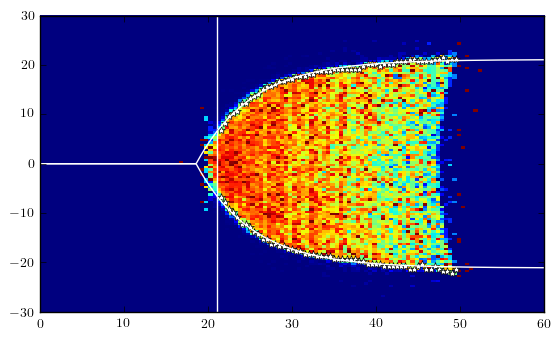

In [119]:
def theta0(p, A, B, C):
    Ib = 2250.0
    Imax = 3375.0
    return A + Ib/Imax * B/(p+C)

g.Fit(fdphi, 'RS')
h3.zaxis.set_range(13,13)
h2 = asrootpy(h3.project3_d('yx'))
draw(norm_x_slices(h2), figsize=goldenaspect(6.5))
Xls = np.linspace(0,80, 800)
Y = [fdphi.Eval(x) for x in Xls]
plt.plot(Y1, X1, 'w*') #, fillstyle='none')
plt.plot(Xls, Y, 'w-')
plt.vlines(theta0(1.25, 9.563, 30.341, 0.510), -30, 30, 'w')
plt.plot(Y0, X0, 'w*') #, fillstyle='none')
plt.plot(Xls, [-y for y in Y], 'w-')
plt.show()